In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.np_utils import to_categorical #convert numbers to one-hot-encoding
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


import keras.backend as K
K.set_image_data_format('channels_last')
    
import matplotlib.pyplot as plt


/Users/mac/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import pandas as pd
train=pd.read_csv('digit-recognizer/train.csv')
test=pd.read_csv('digit-recognizer/test.csv')

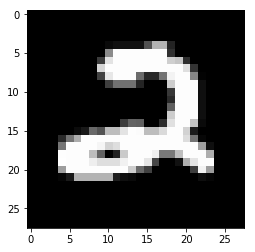

In [4]:
import matplotlib.pyplot as plt
img=test.iloc[0].as_matrix()
img=img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.show()

In [5]:
Y_train_orig=train['label']
X_train_orig=train.drop(labels='label',axis=1)

In [6]:
Y_train_orig=Y_train_orig.values.reshape((Y_train_orig.shape[0]))

In [7]:
from sklearn.model_selection import train_test_split
X_train_orig,X_val,Y_train_orig,Y_val = train_test_split(X_train_orig,Y_train_orig,test_size=0.1,random_state=2)

In [8]:
#Normalization
X_train_orig=X_train_orig.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)
X_train=X_train_orig/225
X_test=test/255

In [9]:
#reshape
Y_train=to_categorical(Y_train_orig,num_classes=10)

# print(Y_train[:10])

In [10]:
Y_val=to_categorical(Y_val,num_classes=10)
X_val=X_val.values.reshape(-1,28,28,1)
X_val=X_val/225

In [11]:
print(Y_train.shape)

(37800, 10)


In [12]:
def digitRecognition(input_shape):
    x_input=Input(input_shape)
    x=ZeroPadding2D((3,3))(x_input)
    x=Conv2D(32,(7,7),strides=(1,1),name='conv0')(x)
    x=BatchNormalization(axis=3,name='bn0')(x)
    x=Activation('relu')(x)
    
    x=MaxPooling2D((2,2),name='max_pool')(x)
    x=Flatten()(x)
    x=Dense(10,activation='softmax',name='fc')(x)
    
    model=Model(input=x_input,output=x,name='digitRecognition')
    return model

In [13]:
digitR=digitRecognition((28,28,1))

/Users/mac/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(name="digitRecognition", inputs=Tensor("in..., outputs=Tensor("fc...)`
  if sys.path[0] == '':


In [14]:
digitR.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
digitR.fit(x=X_train,y=Y_train,epochs=42,batch_size=200)

Epoch 1/42
37800/37800 [==============================] - 57s 1ms/step - loss: 0.2810 - acc: 0.9152
Epoch 2/42
37800/37800 [==============================] - 161s 4ms/step - loss: 0.0861 - acc: 0.9743
Epoch 3/42
37800/37800 [==============================] - 63s 2ms/step - loss: 0.0576 - acc: 0.9831
Epoch 4/42
37800/37800 [==============================] - 57s 2ms/step - loss: 0.0460 - acc: 0.9862
Epoch 5/42
37800/37800 [==============================] - 52s 1ms/step - loss: 0.0422 - acc: 0.9872
Epoch 6/42
37800/37800 [==============================] - 58s 2ms/step - loss: 0.0343 - acc: 0.9887
Epoch 7/42
37800/37800 [==============================] - 61s 2ms/step - loss: 0.0291 - acc: 0.9907
Epoch 8/42
37800/37800 [==============================] - 46s 1ms/step - loss: 0.0258 - acc: 0.9916
Epoch 9/42
37800/37800 [==============================] - 49s 1ms/step - loss: 0.0230 - acc: 0.9924
Epoch 10/42
37800/37800 [==============================] - 54s 1ms/step - loss: 0.0180 - acc: 0.994

In [ ]:
print(Y_train.shape)

In [ ]:
preds=digitR.evaluate(x=X_val,y=Y_val)
print()
print("loss="+str(preds[0]))
print("accuracy="+str(preds[1]))

In [ ]:
Y_test=digitR.predict(X_test)
Y_test=np.argmax(Y_test,axis=1)


In [242]:
Y_ans=pd.Series(Y_test,name='Label')


In [259]:
ans=pd.concat([pd.Series(range(1,Y_ans.shape[0]+1),name='ImageId'),Y_ans],axis=1)
print(ans[:10])

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      0
4        5      3
5        6      7
6        7      0
7        8      3
8        9      0
9       10      3


In [264]:

submission=ans.to_csv('submission.csv')